<a href="https://colab.research.google.com/github/pdm03/pdm03/blob/main/py-tensorflow/DL2-CNN/dl2_01_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료

***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [4]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [5]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- 10 representative numbers

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


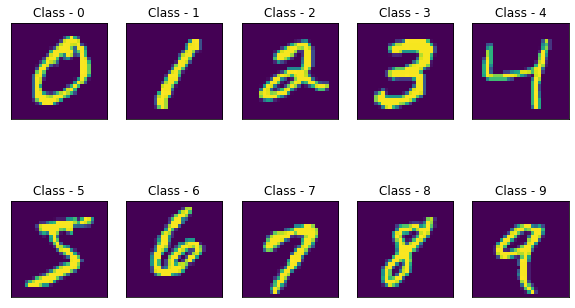

In [6]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class - %d" % (i))
    plt.xticks([])
    plt.yticks([])




# Design CNN

### import Conv2D, MaxPool2D

In [7]:
from keras.layers import Conv2D, MaxPool2D, Flatten

## **CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(8) 

In [8]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [9]:
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [10]:
c1f2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [11]:
3*3*32+32

320

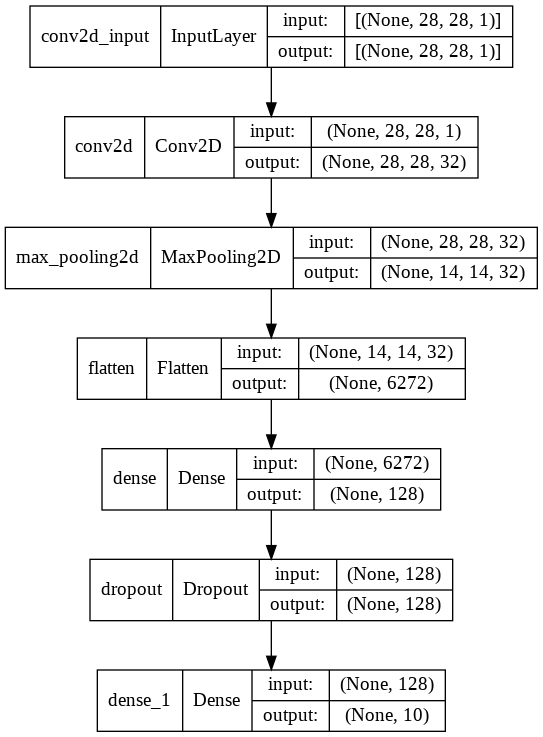

In [12]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(c1f2, show_shapes=True, show_layer_names=True, to_file='model_c1f2.png')

In [13]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
            validation_data = (X_test, y_test))

Epoch 1/20
600/600 [==============================] - 13s 8ms/step - loss: 0.2419 - accuracy: 0.9288 - val_loss: 0.0767 - val_accuracy: 0.9763
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0821 - accuracy: 0.9757 - val_loss: 0.0567 - val_accuracy: 0.9811
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.0447 - val_accuracy: 0.9843
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0455 - accuracy: 0.9860 - val_loss: 0.0395 - val_accuracy: 0.9864
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0394 - val_accuracy: 0.9873
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.0393 - val_accuracy: 0.9868
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch

In [14]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0442 - accuracy: 0.9882


[0.044214069843292236, 0.9882000088691711]

---

## **CNN1 + FCN3**

In [15]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [16]:
c1f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [17]:
c1f3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1605888   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                      

In [18]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 8ms/step - loss: 0.2419 - accuracy: 0.9265
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0741 - accuracy: 0.9773
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0518 - accuracy: 0.9843
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0367 - accuracy: 0.9886
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0298 - accuracy: 0.9904
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0232 - accuracy: 0.9924
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0201 - accuracy: 0.9934
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0160 - accuracy: 0.9949
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0163 - accuracy: 0.9951
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0133 - accuracy: 0.9955

In [19]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0503 - accuracy: 0.9887


[0.05028173699975014, 0.9886999726295471]

## **CNN2 + FCN2**

In [20]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [21]:
c2f2 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),        
    Conv2D(filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [22]:
c2f2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [23]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2207 - accuracy: 0.9329
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0658 - accuracy: 0.9798
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0465 - accuracy: 0.9857
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0369 - accuracy: 0.9887
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0305 - accuracy: 0.9901
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0258 - accuracy: 0.9919
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0224 - accuracy: 0.9928
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0190 - accuracy: 0.9937
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0163 - accuracy: 0.9943
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0143 - accuracy: 0.9955

In [24]:
c2f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0259 - accuracy: 0.9931


[0.025948788970708847, 0.9930999875068665]

## **CNN2 + FCN3**

In [25]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [26]:
c2f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),        
    Conv2D(filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [27]:
c2f3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [28]:
c2f3.fit(X_train, y_train, epochs=20, batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.3011 - accuracy: 0.9069
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0892 - accuracy: 0.9737
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0620 - accuracy: 0.9819
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0506 - accuracy: 0.9853
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0424 - accuracy: 0.9873
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0360 - accuracy: 0.9897
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0317 - accuracy: 0.9905
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0274 - accuracy: 0.9918
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0247 - accuracy: 0.9927
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0208 - accuracy: 0.9938

In [29]:
c2f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0310 - accuracy: 0.9920


[0.030994253233075142, 0.9919999837875366]

In [43]:
c2f3.save('c2f3_best.hdf5')

# **[DIY] Hidden layer에 따른 정확도**

In [30]:
c1f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0503 - accuracy: 0.9887


[0.05028173699975014, 0.9886999726295471]

In [31]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0442 - accuracy: 0.9882


[0.044214069843292236, 0.9882000088691711]

In [32]:
# Try another method!!
cnn_result = [[0.04443372040987015, 0.989300012588501], 
 [0.05037127435207367, 0.9904999732971191], 
 [0.028684262186288834, 0.9929999709129333], 
 [0.05037127435207367, 0.9904999732971191]]

In [33]:
# select accuracies
accuracy = [row[1] for row in cnn_result]
accuracy

[0.989300012588501, 0.9904999732971191, 0.9929999709129333, 0.9904999732971191]

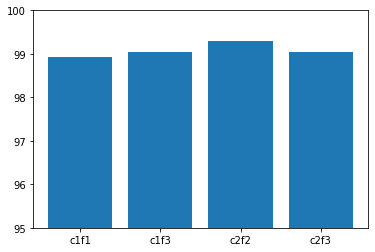

In [34]:
x = np.arange(4)
cnns = ['c1f1','c1f3','c2f2','c2f3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((95,100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [35]:
c2f2.save('c2f2_best.hdf5')

In [36]:
from keras.models import load_model

model = load_model('c2f2_best.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 2s 5ms/step - loss: 0.0259 - accuracy: 0.9931


[0.02594878152012825, 0.9930999875068665]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [37]:
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =100, 
         validation_data=(X_test,y_test))

Epoch 1/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0063 - accuracy: 0.9977 - val_loss: 0.0341 - val_accuracy: 0.9915
Epoch 2/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.0322 - val_accuracy: 0.9924
Epoch 3/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0294 - val_accuracy: 0.9937
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0335 - val_accuracy: 0.9921
Epoch 5/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0303 - val_accuracy: 0.9924
Epoch 6/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0336 - val_accuracy: 0.9916
Epoch 7/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0322 - val_accuracy: 0.9926
Epoch

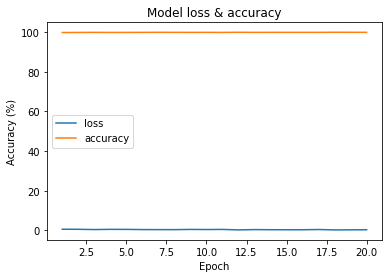

In [38]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

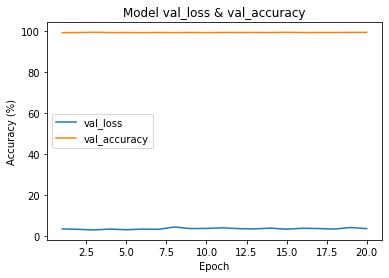

In [39]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

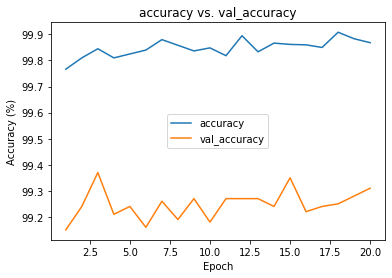

In [40]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [44]:
# Code here!
from keras.models import load_model

model = load_model('c2f3_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0310 - accuracy: 0.9920


[0.030994253233075142, 0.9919999837875366]

In [49]:
hist = model.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size = 100, 
         validation_data=(X_test,y_test))

Epoch 1/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0338 - val_accuracy: 0.9925
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0330 - val_accuracy: 0.9916
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.0330 - val_accuracy: 0.9925
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.0373 - val_accuracy: 0.9921
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0085 - accuracy: 0.9970 - val_loss: 0.0317 - val_accuracy: 0.9920
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.0333 - val_accuracy: 0.9928
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0297 - val_accuracy: 0.9931

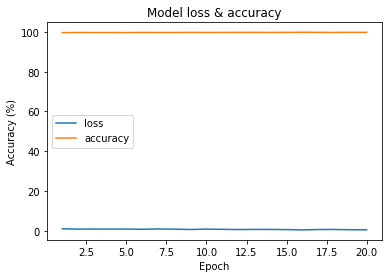

In [50]:
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

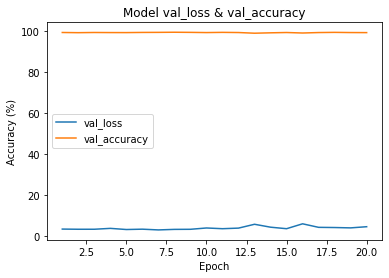

In [51]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

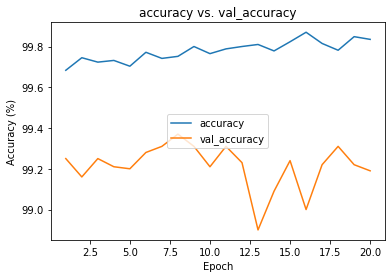

In [52]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')